<a href="https://colab.research.google.com/github/CalistDsouza/Artificial-Intelligence-with-Machine-Learning/blob/main/BBC_Text_Classification_Vectorizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from gensim.models import KeyedVectors
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Read the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Humber/NLP/

/content/drive/MyDrive/Humber/NLP


In [ ]:
df = pd.read_csv('bbc-text.csv')

In [ ]:
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...



# Check the Null Values

In [ ]:
df.isnull().any()

,0
category,False
text,False


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().any()

,0
category,False
text,False


# Check if the data is balance

In [ ]:
df['category'].value_counts()

,count
category,
sport,511
business,510
politics,417
tech,401
entertainment,386


# Change the columns name to labels and text

In [ ]:
df.columns = ['labels', 'text']

# Convert labels to integers

In [ ]:
df['labels'] = df['labels'].map({'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4})

In [ ]:
df.head()

,labels,text
0,3,tv future in the hands of viewers with home th...
1,1,worldcom boss left books alone former worldc...
2,0,tigers wary of farrell gamble leicester say ...
3,0,yeading face newcastle in fa cup premiership s...
4,4,ocean s twelve raids box office ocean s twelve...


# Extract features and labels

In [ ]:
features = df['text']
labels = df['labels']

# Split the data into training and testing

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Import Word2Vec Vectorizer

In [ ]:
from Word2VecVectorizer import Word2VecVectorizer

In [ ]:
vectorizer = Word2VecVectorizer() # Create the instance of Word2Vec vectorizer

Loading in word vectors...
Finished loading in word vectors


# Vectorize Training and Testing data

In [ ]:
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)

Numer of samples with no words found: 0 / 1780
Numer of samples with no words found: 0 / 445


# Instantiate the model and train it

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(Xtrain.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model.fit(Xtrain, train_labels, epochs=10, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.4379 - loss: 1.9113 - val_accuracy: 0.7163 - val_loss: 1.2746
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7548 - loss: 1.1283 - val_accuracy: 0.9270 - val_loss: 0.6478
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8922 - loss: 0.6820 - val_accuracy: 0.9522 - val_loss: 0.4872
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9341 - loss: 0.5326 - val_accuracy: 0.9522 - val_loss: 0.4178
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9332 - loss: 0.4867 - val_accuracy: 0.9607 - val_loss: 0.3854
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9472 - loss: 0.4476 - val_accuracy: 0.9579 - val_loss: 0.3916
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9553 - loss: 0.4107 - val_accuracy: 0.9719 - val_loss: 0.3476
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9638 - loss: 0.3826 - val_accuracy: 0.9691 - val_loss

In [ ]:
y_pred = model.predict(Xtest)
y_pred = np.argmax(y_pred, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

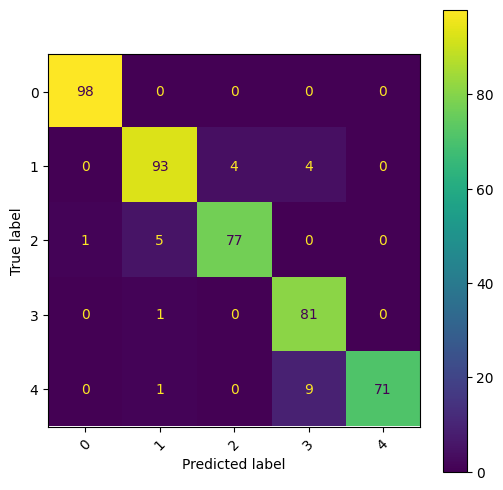

In [ ]:
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1 , 2 , 3 , 4])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [ ]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, y_pred, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, y_pred, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, y_pred, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, y_pred, average = 'macro')))

Accuracy : 0.94
Precision : 0.95
Recall : 0.94
F1_Score : 0.94


## Count Vectorizer

In [ ]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train_data)

In [ ]:
X_test_counts = vectorizer.transform(test_data)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_counts.shape[1],), kernel_regularizer=l2(0.01)))  # Increased neurons, added L2 regularization
model.add(Dropout(0.4))  # Adjusted dropout rate
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # Added another dense layer with regularization
model.add(Dropout(0.3))  # Adjusted dropout rate
model.add(Dense(5, activation='softmax'))  # Assuming 5 classes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_counts.toarray(), train_labels, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.6084 - loss: 4.3745 - val_accuracy: 0.9691 - val_loss: 1.5693
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9869 - loss: 1.3853 - val_accuracy: 0.9831 - val_loss: 0.9800
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9946 - loss: 0.8658 - val_accuracy: 0.9747 - val_loss: 0.7367
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9798 - loss: 0.7287 - val_accuracy: 0.9803 - val_loss: 0.7130
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9960 - loss: 0.6520 - val_accuracy: 0.9691 - val_loss: 0.5980
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9951 - loss: 0.5065 - val_accuracy: 0.9663 - val_loss: 0.4868
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9969 - loss: 0.4084 - val_accuracy: 0.9663 - val_loss: 0.4371
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9948 - loss: 0.3659 - val_accuracy: 0.9663 - val_lo

In [ ]:
y_pred = model.predict(X_test_counts.toarray())
y_pred = np.argmax(y_pred, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, y_pred, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, y_pred, average='macro')))
print("Recall : %2.2f" % (recall_score(test_labels, y_pred, average='macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, y_pred, average='macro')))

Accuracy : 0.95
Precision : 0.95
Recall : 0.95
F1_Score : 0.95


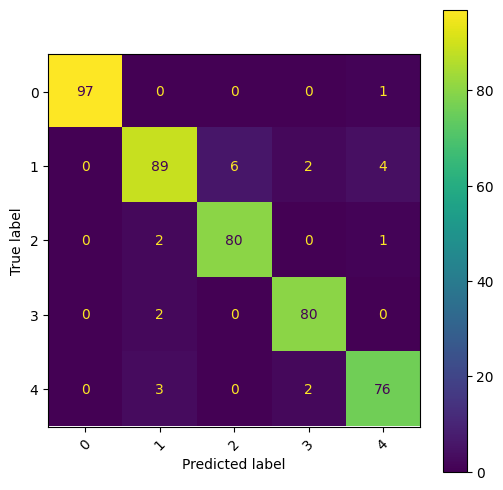

In [ ]:
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])  # Adjust display labels if necessary
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_data)

In [ ]:
X_test_tfidf = vectorizer.transform(test_data)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_tfidf.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_tfidf.toarray(), train_labels, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.4528 - loss: 1.9550 - val_accuracy: 0.9326 - val_loss: 0.9059
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9621 - loss: 0.7149 - val_accuracy: 0.9888 - val_loss: 0.4173
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9928 - loss: 0.3856 - val_accuracy: 0.9775 - val_loss: 0.3585
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9976 - loss: 0.3059 - val_accuracy: 0.9888 - val_loss: 0.3162
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9992 - loss: 0.2619 - val_accuracy: 0.9860 - val_loss: 0.2900
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.2392 - val_accuracy: 0.9775 - val_loss: 0.2708
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9998 - loss: 0.2141 - val_accuracy: 0.9888 - val_loss: 0.2502
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9999 - loss: 0.2001 - val_accuracy: 0.9831 - val_loss

In [ ]:
y_pred = model.predict(X_test_tfidf.toarray())
y_pred_labels = np.argmax(y_pred, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, y_pred_labels, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, y_pred_labels, average='macro')))
print("Recall : %2.2f" % (recall_score(test_labels, y_pred_labels, average='macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, y_pred_labels, average='macro')))

Accuracy : 0.96
Precision : 0.96
Recall : 0.96
F1_Score : 0.96


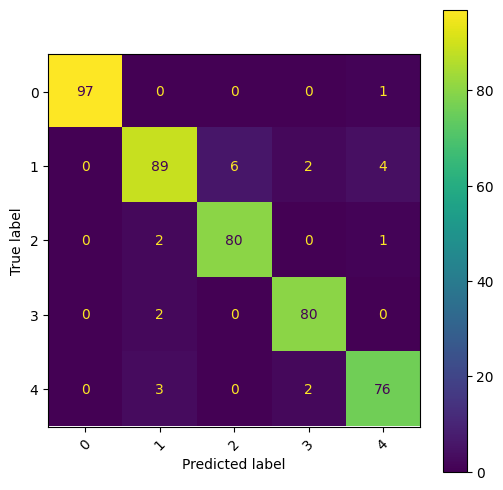

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])  # Adjust display labels if necessary
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

### Word2Vec: Achieved the highest accuracy (~97%), effectively capturing semantic relationships between words.
### TF-IDF: Performed well with ~96% accuracy, demonstrating its ability to capture word importance.
### CountVectorizer: Had the lowest accuracy (~93%), suggesting limitations in capturing word nuances.